## 1. Importowanie danych

In [28]:
from utils.datahandler import DataHandler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
datahandler = DataHandler()

datahandler.load_data()

datahandler.prepare_data(ohe=True)
df = datahandler.get_data()
X_train, X_test, y_train, y_test = datahandler.get_data_split()

In [3]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,-0.328602,4.185032,2.706375,9.813449e-01,4.418381,-1.189510,1.189990,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,False
1,0.786070,-0.328602,-0.238947,2.121559,-4.487029e-16,4.418381,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,False
2,1.626390,-0.328602,4.185032,-0.005028,4.592691e-01,4.418381,-1.189510,1.189990,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,False
3,0.255342,-0.328602,-0.238947,1.437358,7.012067e-01,4.418381,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,True
4,1.582163,3.043196,-0.238947,1.501184,-6.230830e-01,4.418381,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,3.043196,-0.238947,-0.494658,-4.487029e-16,-0.226327,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,1.304165,False
5106,1.670617,-0.328602,-0.238947,0.420775,1.414286e+00,-0.226327,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,1.304165,False
5107,-0.363842,-0.328602,-0.238947,-0.511443,2.173316e-01,-0.226327,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,False
5108,0.343796,-0.328602,-0.238947,1.328257,-4.193461e-01,-0.226327,-1.189510,1.189990,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,2.184951,-0.766774,False


In [4]:
j = 200 #Rekords o tym indeksie jest w późniejszej części kodu analizowany

X_test.iloc[j, :]

age                               1.007207
hypertension                     -0.328602
heart_disease                    -0.238947
avg_glucose_level                -0.690554
bmi                               0.472003
stroke                           -0.226327
gender_Female                     0.840682
gender_Male                      -0.840343
gender_Other                     -0.013990
ever_married_No                  -0.723884
ever_married_Yes                  0.723884
work_type_Govt_job               -0.384111
work_type_Never_worked           -0.065756
work_type_Private                -1.157010
work_type_Self-employed           2.288955
work_type_children               -0.394112
Residence_type_Rural              1.016178
Residence_type_Urban             -1.016178
smoking_status_Unknown           -0.658011
smoking_status_formerly smoked   -0.457676
smoking_status_never smoked       1.304165
Name: 4678, dtype: float64

## 2. RandomForest Classifier

### 2.1. Lime

In [5]:
from lime import lime_tabular

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [7]:
print(f"F1 Score {f1_score(y_test, y_pred)}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))

F1 Score 1.0
Accuracy 1.0
[[850   0]
 [  0 172]]


In [8]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values, 
                                              feature_names=X_train.columns.values, 
                                              verbose=True,
                                              mode="regression")

In [9]:
exp = explainer.explain_instance(data_row=X_test.values[j], 
                                 predict_fn=rf.predict)

exp.show_in_notebook(show_table=True)

c:\Users\Stasiek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept -0.18163726262188162
Prediction_local [0.23439344]
Right: False


### 2.2. SHAP

In [10]:
import shap

In [11]:
shap.initjs()

explainer = shap.Explainer(rf.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 1023it [05:00,  3.34it/s]                          


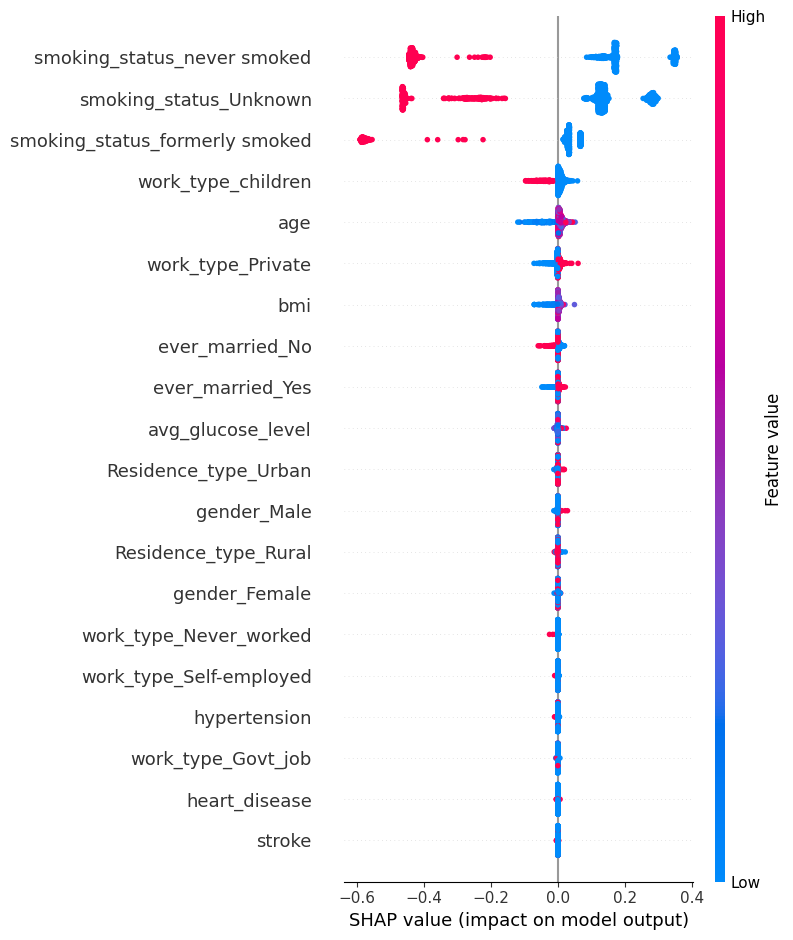

In [12]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [13]:
shap.plots.force(shap_values.base_values[j], 
                shap_values.values[j], 
                shap_values.data[j], 
                feature_names=X_test.columns)

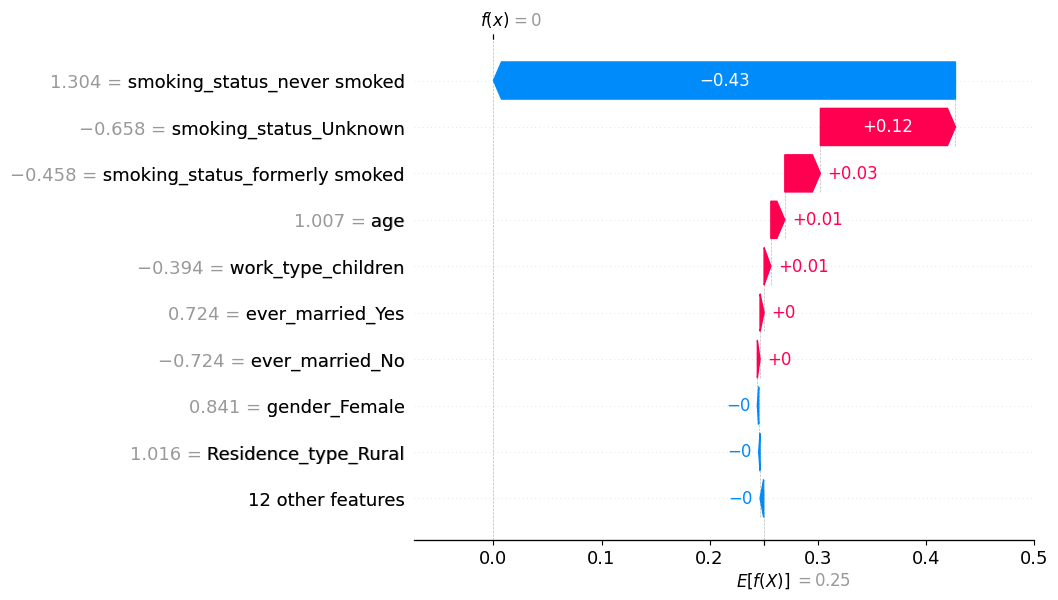

In [14]:
shap.plots.waterfall(shap_values[j])

### 2.3. Partial Dependance Plot

In [15]:
from sklearn.inspection import partial_dependence

In [34]:
feature = 'age'

pdp_lines = partial_dependence(estimator=rf,
                               X=X_test,
                               features=[feature],
                               percentiles=(0, 1),
                               kind='individual')

In [35]:
pdp_lines

{'individual': array([[[0.1 , 0.1 , 0.1 , ..., 0.01, 0.01, 0.01],
         [0.04, 0.04, 0.04, ..., 0.01, 0.02, 0.02],
         [0.04, 0.04, 0.04, ..., 0.05, 0.05, 0.07],
         ...,
         [0.  , 0.  , 0.  , ..., 0.02, 0.02, 0.02],
         [0.04, 0.04, 0.04, ..., 0.01, 0.01, 0.01],
         [0.  , 0.  , 0.  , ..., 0.01, 0.01, 0.01]]]),
 'values': [array([-1.90472303, -1.90118484, -1.89764665, -1.89057028, -1.88703209,
         -1.87995571, -1.87287933, -1.85695748, -1.85341929, -1.8498811 ,
         -1.84634291, -1.84280472, -1.83572834, -1.83219015, -1.82865196,
         -1.82334467, -1.77911731, -1.73488994, -1.69066257, -1.6464352 ,
         -1.60220783, -1.55798046, -1.51375309, -1.46952573, -1.42529836,
         -1.38107099, -1.33684362, -1.29261625, -1.24838888, -1.20416151,
         -1.15993415, -1.11570678, -1.07147941, -1.02725204, -0.98302467,
         -0.9387973 , -0.89456993, -0.85034257, -0.8061152 , -0.76188783,
         -0.71766046, -0.67343309, -0.62920572, -0.5849

In [36]:
print(len(pdp_lines['individual'][0]))
print(np.shape(pdp_lines['values']))
print(np.shape(pdp_lines['individual']))

#(1, 2), dlatego że jest to zmienna kategoryczna i true false, więc przyjmuje tylko dwie wartości
#PDP to tego typu zmiennych może się nie nadawać

1022
(1, 96)
(1, 1022, 96)


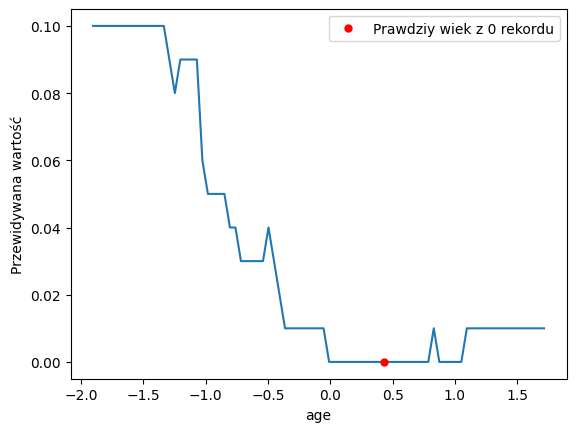

In [39]:
plt.plot(pdp_lines['values'][0], pdp_lines['individual'][0][0])

value_0 = X_train.iloc[0, :]    #Rekord, który jest wyświetlany na wykresie

plt.plot(value_0[feature], y_pred[0], 'ro', markersize=5, label=f"Prawdziy wiek z {0} rekordu")

plt.ylabel("Przewidywana wartość")
plt.xlabel(f"{feature}")
plt.legend(loc="upper right")

plt.show()

In [40]:
pdp_lines = partial_dependence(estimator=rf,
                               X=X_test,
                               features=[feature],
                               percentiles=(0, 1),
                               kind='average')

In [41]:
pdp_lines

{'average': array([[0.14790607, 0.14790607, 0.14790607, 0.14790607, 0.14790607,
         0.14790607, 0.14790607, 0.14790607, 0.14790607, 0.14790607,
         0.14790607, 0.14790607, 0.14790607, 0.14790607, 0.14790607,
         0.14790607, 0.14790607, 0.14790607, 0.14790607, 0.14790607,
         0.14790607, 0.14790607, 0.14790607, 0.14908023, 0.14424658,
         0.1442955 , 0.14380626, 0.13979452, 0.1388454 , 0.14105675,
         0.14760274, 0.15411937, 0.15787671, 0.168591  , 0.16925636,
         0.16892368, 0.17200587, 0.17552838, 0.17684932, 0.17520548,
         0.17601761, 0.1755773 , 0.17609589, 0.17842466, 0.1773092 ,
         0.17786693, 0.17635029, 0.17259295, 0.17274951, 0.17297456,
         0.17233855, 0.17143836, 0.17061644, 0.17043053, 0.17001957,
         0.17055773, 0.17100783, 0.17051859, 0.17078278, 0.17053816,
         0.17161448, 0.17116438, 0.17129159, 0.17135029, 0.17046967,
         0.1703229 , 0.1698728 , 0.16969667, 0.16906067, 0.16886497,
         0.16686888, 0.

In [44]:
print(len(pdp_lines['average'][0]))
print(np.shape(pdp_lines['values']))
print(np.shape(pdp_lines['average']))

96
(1, 96)
(1, 96)


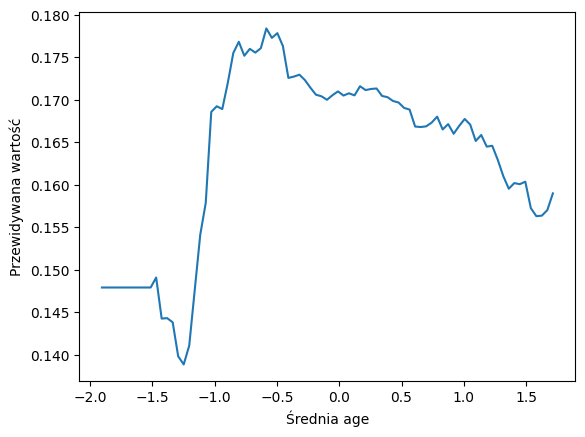

In [48]:
plt.plot(pdp_lines['values'][0], pdp_lines['average'][0])

plt.ylabel("Przewidywana wartość")
plt.xlabel(f"Średnia {feature}")

plt.show()

### 2.4. Individual Conditional Expectation

In [49]:
from sklearn.inspection import PartialDependenceDisplay